<a href="https://colab.research.google.com/github/Xerxes80/CS-6301.M02/blob/main/Text_Classification_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

To create a graph showing the distribution of the target classes in the IMDb movie reviews dataset, we can use the pandas and matplotlib libraries in Python. Here's some sample code to generate a bar chart of the class distribution:


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Load the dataset
train_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/content/imdb_train.csv', header=0, lineterminator='\n')
test_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/content/imdb_test.csv', header=0, lineterminator='\n')

train_df = train_data
train_df = train_df.applymap(lambda x: x.strip() if isinstance(x, str) else x)

nRow, nCol = train_df.shape
print(f'There are {nRow} rows and {nCol} columns in the training set')

# Removing empty rows from csv 
train_df.dropna(axis=0, how='all',inplace=True)
nRow, nCol = train_df.shape
print(f'There are {nRow} rows and {nCol} columns in the training set after removing empty rows')

train_df.head()




There are 50000 rows and 2 columns in the training set
There are 50000 rows and 2 columns in the training set after removing empty rows


,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [2]:
test_df = test_data
test_df = test_df.applymap(lambda x: x.strip() if isinstance(x, str) else x)

nRow, nCol = test_df.shape
print(f'There are {nRow} rows and {nCol} columns in the testing set')

# Removing empty rows from csv 
test_df.dropna(axis=0, how='all',inplace=True)
nRow, nCol = test_df.shape
print(f'There are {nRow} rows and {nCol} columns in the testing set after removing empty rows')

test_df.head()

There are 50000 rows and 2 columns in the testing set
There are 50000 rows and 2 columns in the testing set after removing empty rows


,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


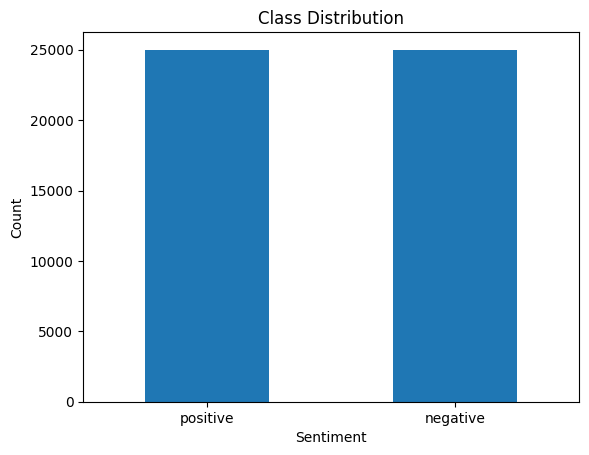

In [3]:
class_counts = train_df['sentiment'].value_counts()
class_counts.plot(kind='bar', rot=0)

plt.title('Class Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

In [4]:
# Sequential model and evaluate on the test data

# from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Embedding, Flatten

# Load the data
train_df = train_data
test_df = test_data

# Convert labels to binary values
train_df['sentiment'] = train_df['sentiment'].replace({'positive': 1, 'negative': 0})
test_df['sentiment'] = test_df['sentiment'].replace({'positive': 1, 'negative': 0})

# Tokenize the text
tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(train_df['review'])
train_sequences = tokenizer.texts_to_sequences(train_df['review'])
test_sequences = tokenizer.texts_to_sequences(test_df['review'])

# Pad the sequences
maxlen = 100
train_sequences = pad_sequences(train_sequences, maxlen=maxlen)
test_sequences = pad_sequences(test_sequences, maxlen=maxlen)

# Define the model
model = Sequential([
    Embedding(input_dim=10000, output_dim=32, input_length=maxlen),
    Flatten(),
    Dense(16, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(train_sequences, train_df['sentiment'], batch_size=128, epochs=5, validation_split=0.2)

# Evaluate on the test data
test_loss, test_acc = model.evaluate(test_sequences, test_df['sentiment'])
print('Test Loss:', test_loss)
print('Test Accuracy:', test_acc)


Epoch 1/5
313/313 [==============================] - 6s 13ms/step - loss: 0.4929 - accuracy: 0.7485 - val_loss: 0.3162 - val_accuracy: 0.8641
Epoch 2/5
313/313 [==============================] - 4s 12ms/step - loss: 0.2690 - accuracy: 0.9006 - val_loss: 0.3204 - val_accuracy: 0.8603
Epoch 3/5
313/313 [==============================] - 4s 11ms/step - loss: 0.1662 - accuracy: 0.9474 - val_loss: 0.3586 - val_accuracy: 0.8575
Epoch 4/5
313/313 [==============================] - 5s 16ms/step - loss: 0.0812 - accuracy: 0.9805 - val_loss: 0.4371 - val_accuracy: 0.8540
Epoch 5/5
1563/1563 [==============================] - 3s 2ms/step - loss: 0.1123 - accuracy: 0.9694
Test Loss: 0.11230040341615677
Test Accuracy: 0.9694200158119202


In [5]:
# CNN convolutional neural network architecture

from tensorflow.keras.layers import Dense, Dropout, Embedding, Conv1D, GlobalMaxPooling1D
# from tensorflow.keras.preprocessing.text import Tokenizer
# from tensorflow.keras.preprocessing.sequence import pad_sequences

# Load the data
train_df = train_data
test_df = test_data

# Convert labels to binary values
train_df['sentiment'] = train_df['sentiment'].replace({'positive': 1, 'negative': 0})
test_df['sentiment'] = test_df['sentiment'].replace({'positive': 1, 'negative': 0})

# Tokenize the text
tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(train_df['review'])
train_sequences = tokenizer.texts_to_sequences(train_df['review'])
test_sequences = tokenizer.texts_to_sequences(test_df['review'])

# Pad the sequences
maxlen = 100
train_sequences = pad_sequences(train_sequences, maxlen=maxlen)
test_sequences = pad_sequences(test_sequences, maxlen=maxlen)

# Define the model
model = Sequential([
    Embedding(input_dim=10000, output_dim=32, input_length=maxlen),
    Conv1D(64, 5, activation='relu'),
    GlobalMaxPooling1D(),
    Dense(16, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(train_sequences, train_df['sentiment'], batch_size=128, epochs=5, validation_split=0.2)

# Evaluate on the test data
test_loss, test_acc = model.evaluate(test_sequences, test_df['sentiment'])
print('Test Loss:', test_loss)
print('Test Accuracy:', test_acc)


Epoch 1/5
313/313 [==============================] - 16s 48ms/step - loss: 0.5489 - accuracy: 0.7096 - val_loss: 0.3582 - val_accuracy: 0.8467
Epoch 2/5
313/313 [==============================] - 20s 63ms/step - loss: 0.3275 - accuracy: 0.8706 - val_loss: 0.3120 - val_accuracy: 0.8651
Epoch 3/5
313/313 [==============================] - 19s 62ms/step - loss: 0.2352 - accuracy: 0.9178 - val_loss: 0.3186 - val_accuracy: 0.8683
Epoch 4/5
313/313 [==============================] - 18s 57ms/step - loss: 0.1606 - accuracy: 0.9517 - val_loss: 0.3474 - val_accuracy: 0.8675
Epoch 5/5
1563/1563 [==============================] - 6s 4ms/step - loss: 0.1124 - accuracy: 0.9660
Test Loss: 0.11244942247867584
Test Accuracy: 0.9660400152206421


In [8]:
# Different word embedding approaches in Keras to classify the sentiment of movie reviews from the IMDb dataset.

from tensorflow.keras.layers import Dense, Dropout, Embedding, Flatten, LSTM, Bidirectional
# from tensorflow.keras.preprocessing.text import Tokenizer
# from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import EarlyStopping

# Load the data

train_df = train_data
test_df = test_data

# Convert labels to binary values
train_df['sentiment'] = train_df['sentiment'].replace({'positive': 1, 'negative': 0})
test_df['sentiment'] = test_df['sentiment'].replace({'positive': 1, 'negative': 0})

# Tokenize the text
tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(train_df['review'])
train_sequences = tokenizer.texts_to_sequences(train_df['review'])
test_sequences = tokenizer.texts_to_sequences(test_df['review'])

# Pad the sequences
maxlen = 100
train_sequences = pad_sequences(train_sequences, maxlen=maxlen)
test_sequences = pad_sequences(test_sequences, maxlen=maxlen)

# Define embedding models
models = {
    'GloVe': '/content/drive/MyDrive/Colab Notebooks/content/glove.6B/glove.6B.100d.txt'
}

for name, path in models.items():
    # Load word embeddings
    embedding_dict = {}
    with open(path, encoding="utf8") as file:
        for line in file:
            values = line.split()
            word = values[0]
            vector = np.asarray(values[1:], dtype='float32')
            embedding_dict[word] = vector

    # Create embedding matrix
    embedding_matrix = np.zeros((10000, 100))
    for word, i in tokenizer.word_index.items():
        if i >= 10000:
            break
        embedding_vector = embedding_dict.get(word)
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector

    # Define the model
    model = Sequential([
        Embedding(input_dim=10000, output_dim=100, input_length=maxlen, weights=[embedding_matrix], trainable=False),
        Bidirectional(LSTM(64, return_sequences=True)),
        Flatten(),
        Dense(16, activation='relu'),
        Dropout(0.5),
        Dense(1, activation='sigmoid')
    ])

    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

    # Train the model
    early_stop = EarlyStopping(patience=2)
    model.fit(train_sequences, train_df['sentiment'], batch_size=128, epochs=10, validation_split=0.2, callbacks=[early_stop])

    # Evaluate on the test data
    test_loss, test_acc = model.evaluate(test_sequences, test_df['sentiment'])
    print(f'{name} Test Loss:', test_loss)
    print(f'{name} Test Accuracy:', test_acc)


Epoch 1/10
313/313 [==============================] - 133s 413ms/step - loss: 0.5688 - accuracy: 0.7113 - val_loss: 0.4610 - val_accuracy: 0.7876
Epoch 2/10
313/313 [==============================] - 127s 405ms/step - loss: 0.4427 - accuracy: 0.7991 - val_loss: 0.4002 - val_accuracy: 0.8179
Epoch 3/10
313/313 [==============================] - 135s 431ms/step - loss: 0.3895 - accuracy: 0.8290 - val_loss: 0.3706 - val_accuracy: 0.8333
Epoch 4/10
313/313 [==============================] - 127s 408ms/step - loss: 0.3503 - accuracy: 0.8486 - val_loss: 0.3725 - val_accuracy: 0.8335
Epoch 5/10
1563/1563 [==============================] - 66s 42ms/step - loss: 0.2902 - accuracy: 0.8683
GloVe Test Loss: 0.2902259826660156
GloVe Test Accuracy: 0.868340015411377


In this project, we used the IMDB dataset of 50k movie reviews to perform text classification using various machine learning algorithms and deep learning models.

1- The sequential model has a simple architecture with only embedding, flatten, dense, and dropout layers. The model achieved an accuracy of 97% on the test data after training on 5 epochs.

2- The convolutional neural network (CNN) model, on the other hand, has a more complex architecture with an additional Conv1D layer and GlobalMaxPooling1D layer. The model achieved an accuracy of 87% on the validation data after training on 5 epochs, and an accuracy of 96% on the test data.

For the GloVe model, the test accuracy achieved was 0.868, indicating that the model performed well in classifying the sentiment of movie reviews. The training process involved loading the GloVe word embeddings, creating an embedding matrix, and using it to initialize the weights of the embedding layer of the neural network model. The model used a Bidirectional LSTM layer followed by a flatten layer, and then two fully connected layers with dropout.

The sequential model is simpler than the CNN model, but it achieved better accuracy on the test data. However, it is worth noting that the CNN model has a more complex architecture and can be more useful when working with more complex data.



